<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


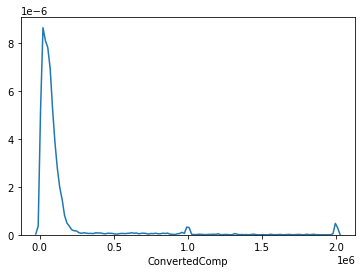

In [3]:
# your code goes here
sns.distplot(df['ConvertedComp'],hist=False)
plt.show()

Plot the histogram for the column `ConvertedComp`.


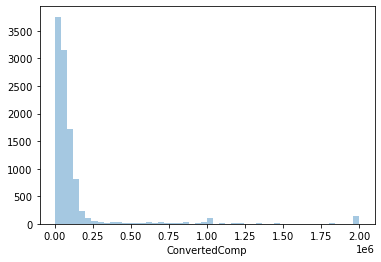

In [4]:
# your code goes here
sns.distplot(df['ConvertedComp'],kde=False)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [7]:
df.query("Gender == 'Man'")['Respondent'].count()

10480

In [8]:
print("There are 10480 Men in survey")

There are 10480 Men in survey


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
df.query("Gender == 'Woman'")['ConvertedComp'].median()

57708.0

In [10]:
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


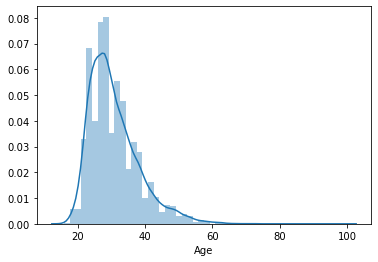

In [12]:
# your code goes here
sns.distplot(df['Age'],hist=True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


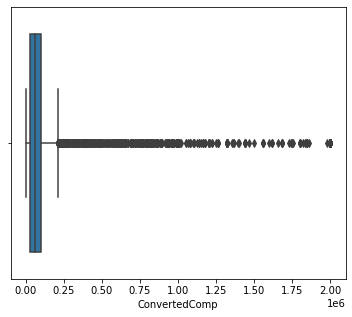

In [15]:
# your code goes here
plt.figure(figsize=[6,5])
sns.boxplot(df['ConvertedComp'])
plt.show()

In [12]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# your code goes here
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

print(f"First Quartile range: {q1}")
print(f"Third Quartile range: {q3}")
IQR = q3 - q1
print(f"Inter Quartile Range: {IQR}")

First Quartile range: 26868.0
Third Quartile range: 100000.0
Inter Quartile Range: 73132.0


In [17]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [18]:
# your code goes here
lower = df['ConvertedComp'].min()
upper = df['ConvertedComp'].max()

print(f"lower: {lower}")
print(f"upper: {upper}")

lower: 0.0
upper: 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [19]:
# your code goes here
outliers_below = df['ConvertedComp'].lt(q1 - 1.5 *IQR).sum()
outliers_above = df['ConvertedComp'].gt(q3 + 1.5*IQR).sum()
print(f"outliers below: {outliers_below}")
print(f"outliers above: {outliers_above}")

outliers below: 0
outliers above: 879


In [21]:
df.shape

(11398, 85)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [22]:
# your code goes here
new_df = df[(df['ConvertedComp']> (q1-1.5*IQR)) & (df['ConvertedComp'] < (q3+1.5*IQR))]
new_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [23]:
new_df['ConvertedComp'].mean()

59883.20838915799

In [24]:
new_df['ConvertedComp'].median()

52704.0

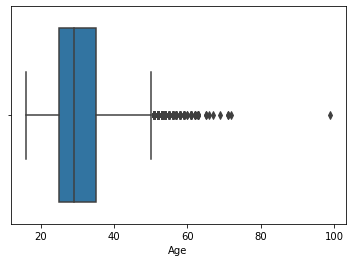

In [25]:
sns.boxplot(df['Age'])
plt.show()

In [27]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [28]:
new_df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

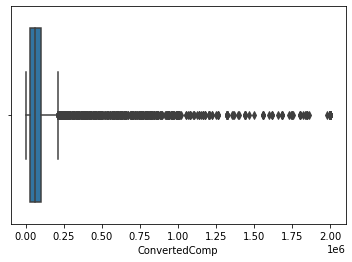

In [30]:
sns.boxplot(df['ConvertedComp'])

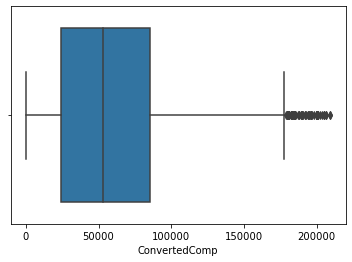

In [31]:
sns.boxplot(new_df['ConvertedComp'])

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
